# x y

In [217]:
import numpy as np
import matplotlib.pyplot as plt

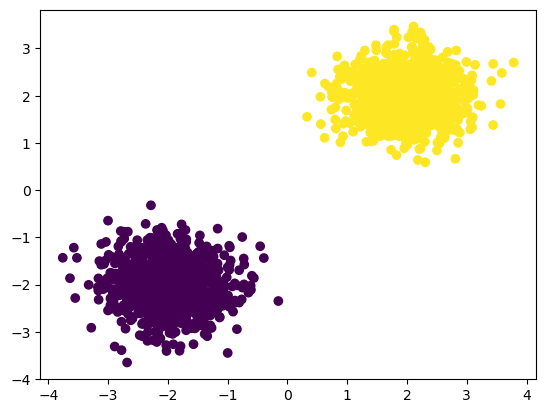

In [277]:
def generate_xor(N: int, noise: int):
    def get_xor_label(x, y):
        return 1 if x * y >= 0 else -1
    
    get_xor_label = np.vectorize(get_xor_label)
    padding = .3
    x = np.random.uniform(-5, 5, N)
    x += np.where(x > 0, padding, -padding)
    y = np.random.uniform(-5, 5, N)
    y += np.where(y > 0, padding, -padding)
    noise_x = np.random.uniform(-5, 5, N) * noise
    noise_y = np.random.uniform(-5, 5, N) * noise
    labels = np.where((x + noise_x) * (y + noise_y) >= 0, 1, -1)
    # labels = get_xor_label(x + noise_x, y + noise_y)
    return x, y, labels

def generate_spiral(N: int, noise: int):
    n = N // 2

    def gen_sigle_spiral(delta_t: int, label: int):
        r = np.arange(n) / n * 5
        t = 1.75 * np.arange(n) / n * 2 * np.pi + delta_t
        x = r * np.sin(t) + np.random.uniform(-1, 1, n) * noise
        y = r * np.cos(t) + np.random.uniform(-1, 1, n) * noise
        return x, y, np.full(n, label)
    
    one = gen_sigle_spiral(0, 1)
    second = gen_sigle_spiral(np.pi, -1)

    x = np.concatenate([one[0], second[0]])
    y = np.concatenate([one[1], second[1]])
    labels = np.concatenate([one[2], second[2]])
    return x, y, labels

def generate_circle(N: int, noise: int):
    radius = 5

    def dist(x, y, center_x, center_y):
        return np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    dist = np.vectorize(dist)

    def get_circle_label(x, y, center_x, center_y):
        return 1 if dist(x, y, center_x, center_y) <= radius / 2 else -1
    get_circle_label = np.vectorize(get_circle_label)
    
    r = np.concatenate((np.random.uniform(0, radius / 2, N), (np.random.uniform(radius * .7, radius, N))))
    angle = np.random.uniform(0, 2 * np.pi, N * 2)
    x = r * np.sin(angle)
    noise_x = np.random.uniform(-radius, radius, N * 2) * noise
    y = r * np.cos(angle)
    noise_y = np.random.uniform(-radius, radius, N * 2) * noise
    labels = get_circle_label(x + noise_x, y + noise_y, 0, 0)

    return x, y, labels

def generate_two_gauss(N: int, noise: int):
    variance_scale = np.vectorize(lambda x: .5 + 3.5 * (x / .5))
    variance = variance_scale(noise)

    x = np.concatenate((np.random.normal(2, variance, N), np.random.normal(-2, variance, N)))
    y = np.concatenate((np.random.normal(2, variance, N), np.random.normal(-2, variance, N)))
    labels = np.concatenate((np.full(N, 1), np.full(N, -1)))
    return x, y, labels

x, y, labels = generate_two_gauss(1000, 0)
plt.scatter(x, y, c=labels)